# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# To encode categorical variables
from sklearn.preprocessing import LabelEncoder

# To split train and test data
from sklearn.model_selection import train_test_split

# Decision tree and Random forest classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, recall_score, precision_score, accuracy_score

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.4f' %x)

In [559]:
df = pd.read_csv("ExtraaLearn.csv")

In [560]:
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.8610,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.3200,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.0740,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.0570,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.9140,Email Activity,No,No,No,No,No,0


In [487]:
df.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.1700,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.3930,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.6920,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.8790,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.0750,Phone Activity,No,No,No,No,No,0


In [488]:
df.shape #check the dataframe shape size

(4612, 15)

In [561]:
df_copy=df.copy() #create a copy of the dataframe that will not change when we change df
df_copy2=df #create another copy of the dataframe which will change when we change df

## Data Overview

- The data set has 4612 rows and 15 columns. Out of the 15 columns, 5 are numerical variables and 10 are object variables. 'status' is our target variable, it has integer value 0 and 1 and should be treated as a categorical variable.
- There are no missing values or duplicated rows in the data set.
- ID variable is the unique identifier. 

In [562]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [563]:
df.isnull().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

In [564]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,4612,4612,EXT001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,4612.0000,NaN,NaN,NaN,46.2012,13.1615,18.0000,36.0000,51.0000,57.0000,63.0000
current_occupation,4612,3,Professional,2616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_interaction,4612,2,Website,2542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
profile_completed,4612,3,High,2264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
website_visits,4612.0000,NaN,NaN,NaN,3.5668,2.8291,0.0000,2.0000,3.0000,5.0000,30.0000
time_spent_on_website,4612.0000,NaN,NaN,NaN,724.0113,743.8287,0.0000,148.7500,376.0000,1336.7500,2537.0000
page_views_per_visit,4612.0000,NaN,NaN,NaN,3.0261,1.9681,0.0000,2.0777,2.7920,3.7562,18.4340
last_activity,4612,3,Email Activity,2278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
print_media_type1,4612,2,No,4115,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [565]:
df.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

In [566]:
#Drop the unique identifier 'ID' variable
df=df.drop(['ID'], axis=1)

In [567]:
#validate 'ID' has been dropped
df.columns

Index(['age', 'current_occupation', 'first_interaction', 'profile_completed',
       'website_visits', 'time_spent_on_website', 'page_views_per_visit',
       'last_activity', 'print_media_type1', 'print_media_type2',
       'digital_media', 'educational_channels', 'referral', 'status'],
      dtype='object')

In [568]:
#Check for duplicated rows again
df.duplicated().sum()

14

In [498]:
#We see 14 duplicated rows, print them out and decide if they are legitimate data points 
df[df.duplicated()==1].sort_values(by=['age','current_occupation', 'first_interaction']) 

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
3611,21,Student,Website,Medium,0,0,0.0000,Email Activity,Yes,No,No,No,No,0
1679,32,Unemployed,Mobile App,High,0,0,0.0000,Email Activity,No,No,No,No,No,0
1592,56,Professional,Mobile App,Medium,0,0,0.0000,Phone Activity,No,No,No,No,No,0
1675,56,Professional,Mobile App,Medium,0,0,0.0000,Phone Activity,No,No,No,No,No,0
3278,57,Professional,Mobile App,Medium,0,0,0.0000,Phone Activity,No,No,No,No,No,0
3441,57,Professional,Mobile App,High,0,0,0.0000,Email Activity,No,No,No,Yes,No,0
2980,58,Professional,Mobile App,High,0,0,0.0000,Email Activity,No,No,No,No,No,0
4168,58,Professional,Mobile App,High,0,0,0.0000,Email Activity,No,No,No,No,No,0
1375,58,Professional,Website,High,0,0,0.0000,Phone Activity,No,No,No,No,No,1
3013,58,Unemployed,Website,High,0,0,0.0000,Email Activity,No,No,No,No,No,0


- Note: The duplicated rows above represents users with same profile information. These are valid data points so they will not be removed

In [499]:
#create a list for all numerical variables, another list for all categorical variables. 
num_cols = df.columns[df.dtypes != 'object'].tolist()
cat_cols = df.columns[df.dtypes == 'object'].tolist()

#'status' is a categorical variable, so remove it from the numerical variable list add it to the categorical variable list
num_cols.remove('status')
cat_cols.append('status')

#print out variable list and check for accuracy
print('num_cols:', num_cols)
print('cat_cols:', cat_cols)

num_cols: ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']
cat_cols: ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral', 'status']


## **Univariate analysis of numerical variables**

# <font size="4">Observations</font>
- Average age of the leads is 46.2, ranging from 18 to 63. The median is 51, so the distribution is slighly left skewed.
- Average number of website_visits is 3.6 times, ranging from 0 to 30. The median is 3, so the distribution is slightly right skewed. From the boxplot, we can see there are some outliers.
- Average total time spent on the website is 724 seconds (12 minutes). The median is 376 seconds (6 minutes), so the distribution is right skewed. Max is 2537 seconds (42 minutes).
- Average number of pages on the website viewed during the visits is 3, ranging from 0 to 18. The median is 2.8, so the distribution is slightly right skewed. From the boxplot, we can see there are quite many outliers.

In [16]:
# Checking summary statistics
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.000,46.201,13.161,18.000,36.000,51.000,57.000,63.000
website_visits,4612.000,3.567,2.829,0.000,2.000,3.000,5.000,30.000
time_spent_on_website,4612.000,724.011,743.829,0.000,148.750,376.000,1336.750,2537.000
page_views_per_visit,4612.000,3.026,1.968,0.000,2.078,2.792,3.756,18.434


In [518]:
#Display total time spent on website in minutes for better understanding
df[num_cols].describe().time_spent_on_website/60

count   76.8667
mean    12.0669
std     12.3971
min      0.0000
25%      2.4792
50%      6.2667
75%     22.2792
max     42.2833
Name: time_spent_on_website, dtype: float64

In [521]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize=(12, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,5))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "orange", linestyle = "-"
    )                   # Add median to the histogram

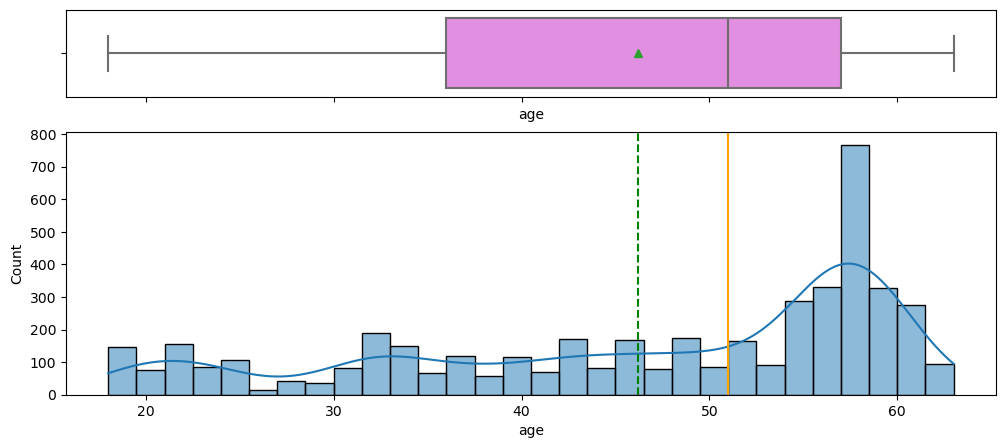

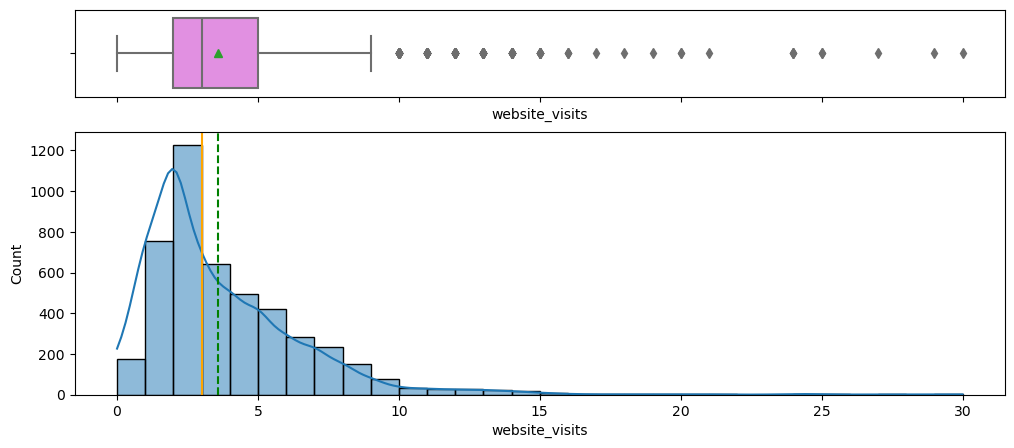

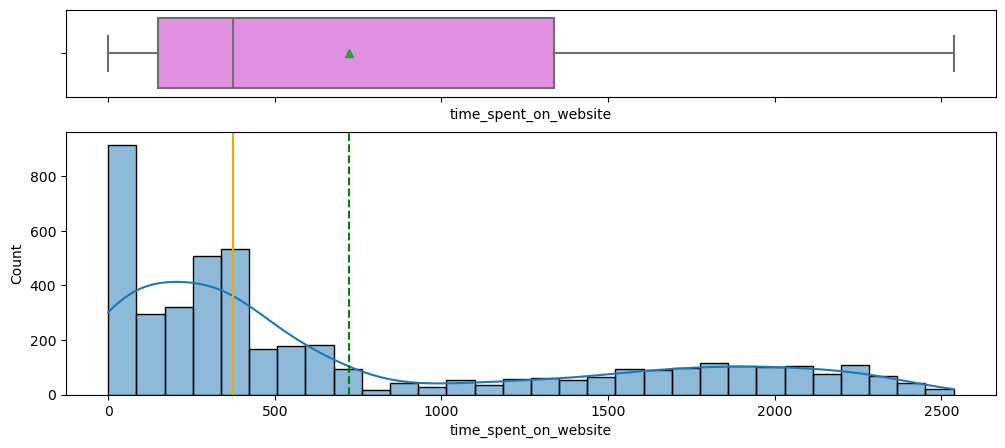

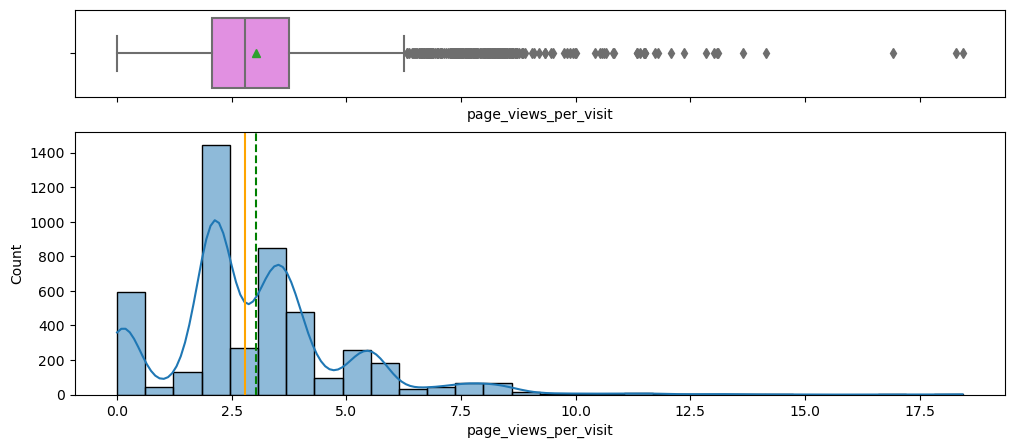

In [522]:
for i in range(len(num_cols)):
    histogram_boxplot(df, num_cols[i], kde = True, bins = 30)

## **Univariate analysis of categorical variables**
# <font size="4">Observations</font>
- current_occupation: More than half (56.7%) leads are working professionals, 31.2% unemployed and 12.0% students.
- first interaction: Website and Mobile App have similar proportions with Website slightly higher at 55%.
- profile completed: Very few leads (2.3%) have Low profile completion (<50%), Medium (50-75%) and High(>75%) completion are roughly half each.
- last_activity: 49% of last interaction between the lead and ExtraaLearn were via email, 27% were via phone, the rest 24% were via website.
- print_media_type1 (Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper): about 11% leads had seen the ad of Extraalearn in the Newspaper
- print_media_type2 (Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine): about 5% leads had seen the ad of Extraalearn in the Magazine
- digital_media: about 11% leads had seen the ad of Extraalearn in the digital media
- educational_channels: about 15% leads had seen the ad of Extraalearn in the Magazine
- referral: 2% leads got to know Extraalearn via referral
- status: 29.86% leads converted to a paid customer

In [529]:
# Create a function to plot categorical variable distributions
def cat_bar(my_df, var, y1):
    ax1=sns.barplot(data=my_df, x=var, y=y1) #plot the bars
    for i in ax1.containers:
        ax1.bar_label(i, labels=[f"{x:.2%}" for x in my_df[y1]])  #add data label to the bars


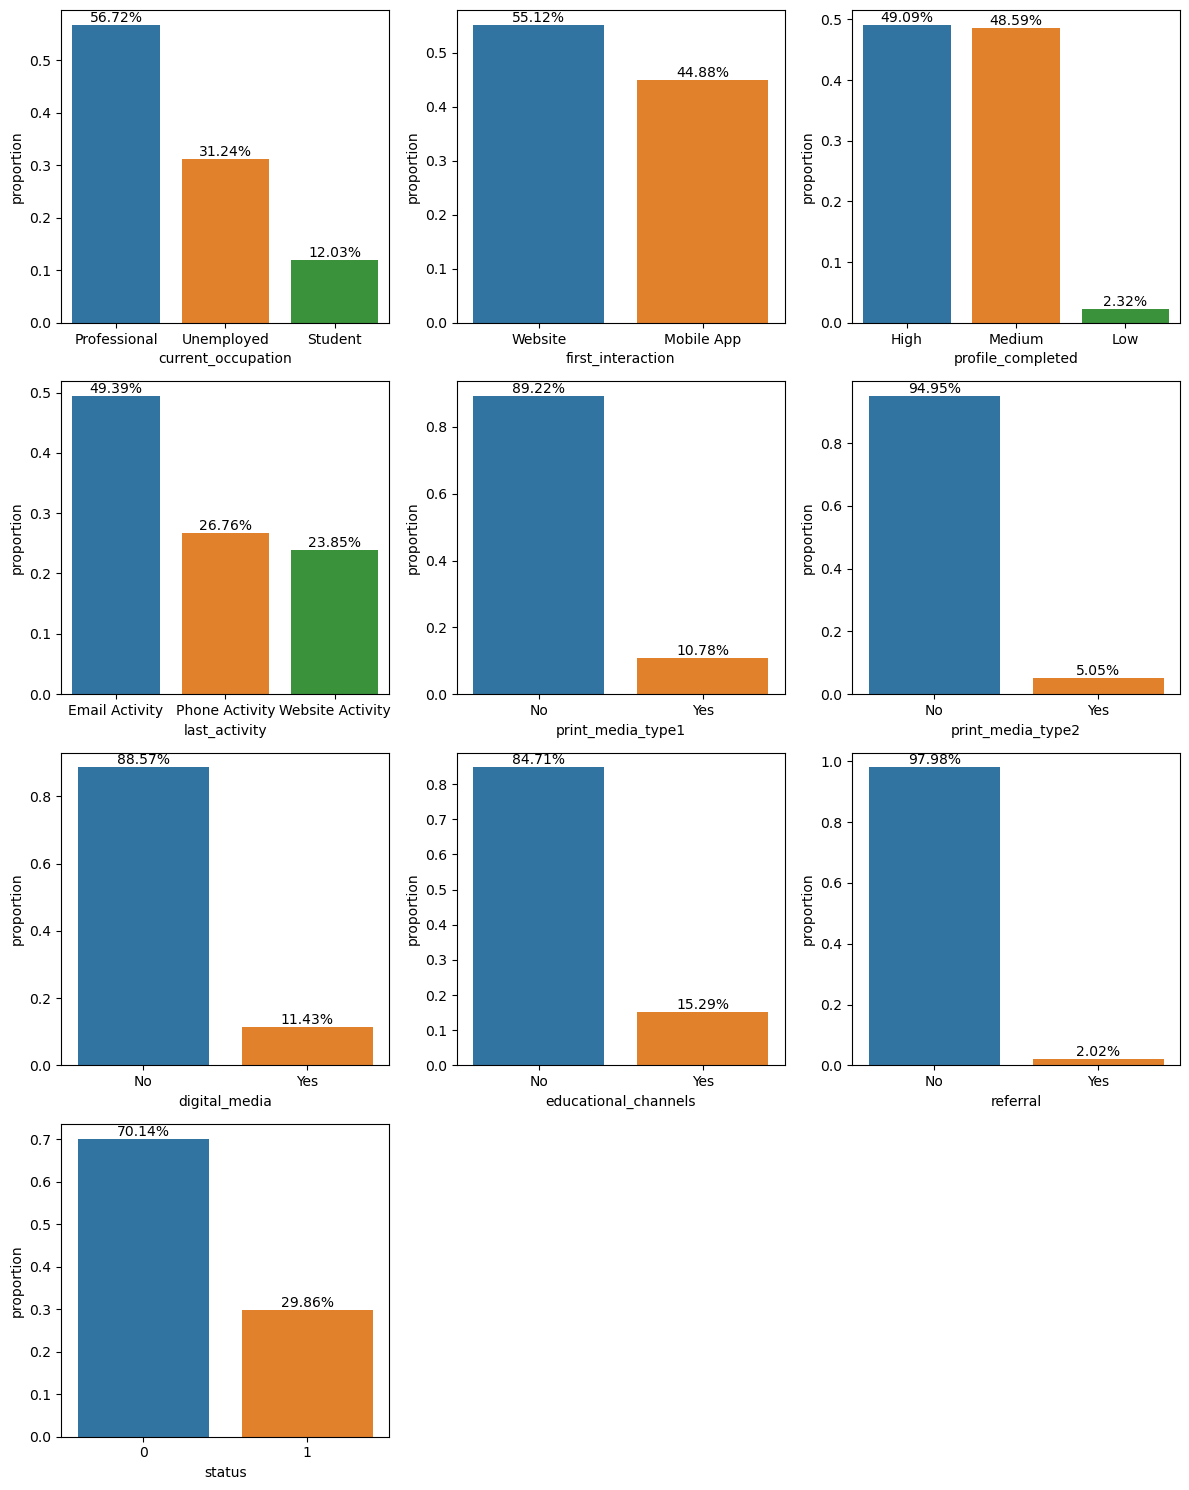

In [531]:
# Plot all categorical variables
plt.figure(figsize=(12,15))

for i, variable in  enumerate(cat_cols):
    plt.subplot(4,3,i+1)
    temp=df[variable].value_counts(normalize=True, dropna = False).reset_index()  #create a dataframe to hold the distribution data for each variable
    cat_bar(temp, temp.columns[0], temp.columns[1])
    plt.tight_layout()
plt.show()

## **Bivariate Analysis**
# <font size="4">Observations</font>

Numerical variables:
- There are no strong correlations between the numerical variables
- Paid customers (i.e. status is 1) are slightly older on average (48.7 years old for paid customers vs. 45.2 for others). If we group the leads into four age quantile groups and study their conversion rate, we can see (1) Age 52-58 group has the highest conversion rate of 35.1%; and (2) age 18-36 has the lowest conversion rate of 21.5%.
- Paid customers spent almost twice the amount of time on website than other leads (1068 seconds vs. 577 seconds) or (17.8 minutes vs. 9.6 minutes). If we group the leads into four quantile groups based on their time spent on website and study their conversion rate, we can see the longer time spent on the website the higher the conversion rate (1) the top two groups have the highest conversion rate of 40.9% and 49.7%; and (2) the bottom two groups has the lowest conversion rate of 15.2% and 13.7%.
- Website visits or page views per visit do not have as big difference among quantile groups as total time spent on website.

Categorical variables:
- Professional leads have the highest conversion rate at 35.5%, followed by unemployed leads at 26.6% and student leads at 11.7%.
- If the first interaction was website, the conversion rate was 45.6%, while it was 10.5% for mobile app.
- Leads with High profile completion (75%+) had conversion rate of 41.8%, while it was 18.9% for Medium completion and 7.5% for Low completion.
- Leads with last activity as website had conversion rate of 38.5%, while it was 30.3% for email and 21.3% for phone.
- Leads who were referrals had very high conversion rate of 67.7% vs. 29.1% for non-referrals. There are strong association between referrals and profile completions.
- Leads who viewed the ads via newspaper, magazine or digital medias had slightly higher conversion rate than others, the difference was small and not significant.
- Leads who viewed the ads via educational channels had slightly lower conversion rate than others, the difference was small and not significant.
- For professional leads, newspaper and digital media channel had slightly higher conversion rate than the magazine channel.
- For unemployed leads, magazine channel had higher conversion rate than newspaper and digital channels. newspaper and digital channels didn't seem to help to improve the conversion rate.
- Regardless of the current occupation, referral leads had much higher conversion rate. 


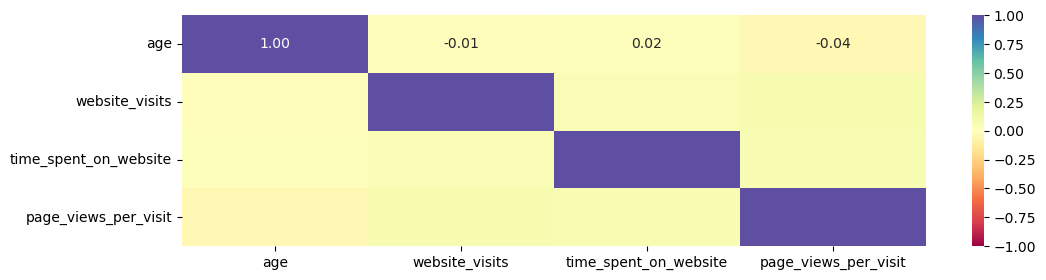

In [20]:
# Check the correlation between numerical variables by creating a heatmap
plt.figure(figsize=(12, 3))
sns.heatmap(df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [569]:
df[num_cols].corr()

,age,website_visits,time_spent_on_website,page_views_per_visit
age,1.0000,-0.0120,0.0189,-0.0407
website_visits,-0.0120,1.0000,0.0623,0.0741
time_spent_on_website,0.0189,0.0623,1.0000,0.0681
page_views_per_visit,-0.0407,0.0741,0.0681,1.0000


In [22]:
#Check numerical variable average by status and see if paid customers have different profile or interactions
for i in num_cols:
    print(df.groupby(['status'])[i].mean().reset_index())
    print('*'*50)

   status    age
0       0 45.153
1       1 48.664
**************************************************
   status  website_visits
0       0           3.579
1       1           3.538
**************************************************
   status  time_spent_on_website
0       0                577.421
1       1               1068.398
**************************************************
   status  page_views_per_visit
0       0                 3.026
1       1                 3.027
**************************************************


In [544]:
#Group numerical variables into quantiles and check average conversion rate by bins.
#num_cols: ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

#Make a new dataframe with only variables of interest
x=df[num_cols]
y=df['status']
bin_data=pd.concat([x,y], axis=1)
bin_data

,age,website_visits,time_spent_on_website,page_views_per_visit,status
0,57,7,1639,1.8610,1
1,56,2,83,0.3200,0
2,52,3,330,0.0740,0
3,53,4,464,2.0570,1
4,23,4,600,16.9140,0
...,...,...,...,...,...
4607,35,15,360,2.1700,0
4608,55,8,2327,5.3930,0
4609,58,2,212,2.6920,1
4610,57,1,154,3.8790,0


In [545]:
#Create column names for quantile values
bins_list=['age_bins', 'website_visits_bins', 'time_spent_on_website_bins', 'page_views_per_visit_bins']

#Create quantiles for numerical variables and add the data to the dataframe
for i in range(0,len(bins_list)):
    bin_data[bins_list[i]] = pd.qcut(bin_data[num_cols[i]], q=4, labels=False)
bin_data

,age,website_visits,time_spent_on_website,page_views_per_visit,status,age_bins,website_visits_bins,time_spent_on_website_bins,page_views_per_visit_bins
0,57,7,1639,1.8610,1,2,3,3,0
1,56,2,83,0.3200,0,2,0,0,0
2,52,3,330,0.0740,0,2,1,1,0
3,53,4,464,2.0570,1,2,2,2,0
4,23,4,600,16.9140,0,0,2,2,3
...,...,...,...,...,...,...,...,...,...
4607,35,15,360,2.1700,0,0,3,1,1
4608,55,8,2327,5.3930,0,2,3,3,3
4609,58,2,212,2.6920,1,3,0,1,1
4610,57,1,154,3.8790,0,2,0,1,3


In [458]:
#Check count of leads in each bin
for i in range(0,len(bins_list)):
    print(bin_data[bins_list[i]].value_counts())


age_bins
0    1207
2    1171
1    1153
3    1081
Name: count, dtype: int64
website_visits_bins
0    2158
2     916
3     897
1     641
Name: count, dtype: int64
time_spent_on_website_bins
1    1154
3    1153
0    1153
2    1152
Name: count, dtype: int64
page_views_per_visit_bins
1    1154
0    1153
3    1153
2    1152
Name: count, dtype: int64


In [546]:
#Check minimum value of each bin for each numerical variables
for i in range(0,len(bins_list)):
    print(bin_data.groupby([bins_list[i]])[num_cols[i]].min())

age_bins
0    18
1    37
2    52
3    58
Name: age, dtype: int64
website_visits_bins
0    0
1    3
2    4
3    6
Name: website_visits, dtype: int64
time_spent_on_website_bins
0       0
1     149
2     377
3    1339
Name: time_spent_on_website, dtype: int64
page_views_per_visit_bins
0   0.0000
1   2.0780
2   2.7930
3   3.7570
Name: page_views_per_visit, dtype: float64


In [462]:
#Make a function to plot conversion rate by bins and proportion of leads in each bin
def sns_bars(my_df, var, y1, y2):
    ax1=sns.barplot(data=my_df, x=var, y=y1)

    for i in ax1.containers:
        ax1.bar_label(i, labels=[f"{x:.2%}" for x in my_df[y1]])  #add data label to the bar

    #add a second axis to how the proportion of leads in each bin
    ax2=ax1.twinx()
    sns.lineplot(data=my_df, x=var, y=y2, ax=ax2, color='red')
    ax2.set_ylim(bottom=0, top=1)

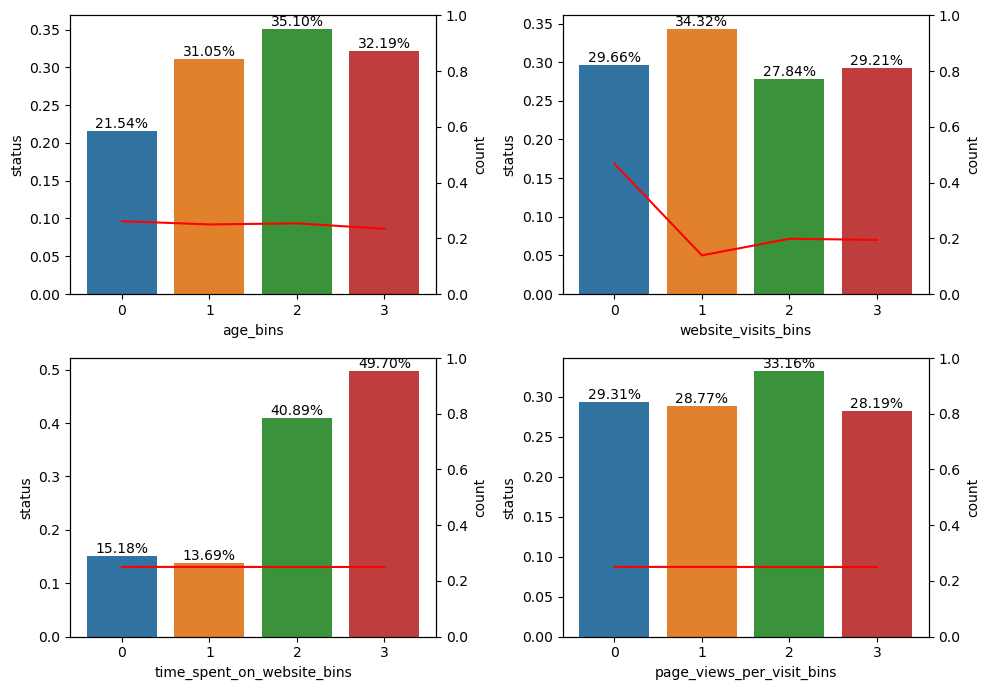

In [547]:
#Plot the above function for all variables we created the bins for
plt.figure(figsize=(10,7))

for i, variable in enumerate(bins_list):
    plt.subplot(2,2,i+1)
    bins_sum=bin_data.groupby(bins_list[i])[[num_cols[i], 'status']].mean().reset_index() #calculate conversion rate by bins
    bins_sum['count']=bin_data[bins_list[i]].value_counts(normalize=True) #calculate proportion of leads by bins
    sns_bars(bins_sum, variable, bins_sum.columns[bins_sum.shape[1]-2], bins_sum.columns[bins_sum.shape[1]-1])
    plt.tight_layout()
plt.show()


In [548]:

#To check if categorical variables are correlated, we can use statistical tests designed for categorical data, such as the Chi-Square Test of Independence. This test helps determine if there is a significant association between two categorical variables. 
from scipy.stats import chi2_contingency

alpha = 0.05  # Significance level
for i in range(0, len(cat_cols)):
    for j in range(0, len(cat_cols)):
        if j>i:
            contingency_table = pd.crosstab(index=df[cat_cols[i]], columns=df[cat_cols[j]])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            if p < alpha:
                print("Significant association between {x} and {y}, (p={z}).".format(x=cat_cols[i], y=cat_cols[j], z='{:.4f}'.format(p)))
            else:
                print("No significant association between {x} and {y}, (p={z}).".format(x=cat_cols[i], y=cat_cols[j], z='{:.4f}'.format(p)))


No significant association between current_occupation and first_interaction, (p=0.4562).
No significant association between current_occupation and profile_completed, (p=0.9145).
No significant association between current_occupation and last_activity, (p=0.6650).
No significant association between current_occupation and print_media_type1, (p=0.3762).
No significant association between current_occupation and print_media_type2, (p=0.3391).
No significant association between current_occupation and digital_media, (p=0.2786).
No significant association between current_occupation and educational_channels, (p=0.5700).
No significant association between current_occupation and referral, (p=0.1888).
Significant association between current_occupation and status, (p=0.0000).
No significant association between first_interaction and profile_completed, (p=0.7086).
No significant association between first_interaction and last_activity, (p=0.9401).
No significant association between first_interaction an

In [ ]:
# Key information we got are as follows:
# Significant association between profile_completed and referral, (p=0.0322).
# No significant association between print_media_type1 and status, (p=0.2941).
# No significant association between print_media_type2 and status, (p=0.4686).
# No significant association between digital_media and status, (p=0.3044).
# No significant association between educational_channels and status, (p=0.2454).

In [24]:
#Check profile_completed and referral crosstab data to gain some insights. 
#Referral volume was very low, but it had higher proportion of High profile completion than non-referrals.

pd.crosstab(index=df['profile_completed'], columns=df['referral'])

referral,No,Yes
profile_completed,,
High,2206,58
Low,106,1
Medium,2207,34


In [550]:
#create a list of categorical variables to show average conversion rate by category.
cat_cols2=cat_cols.copy()
cat_cols2.remove('status')
cat_cols2

['current_occupation',
 'first_interaction',
 'profile_completed',
 'last_activity',
 'print_media_type1',
 'print_media_type2',
 'digital_media',
 'educational_channels',
 'referral']

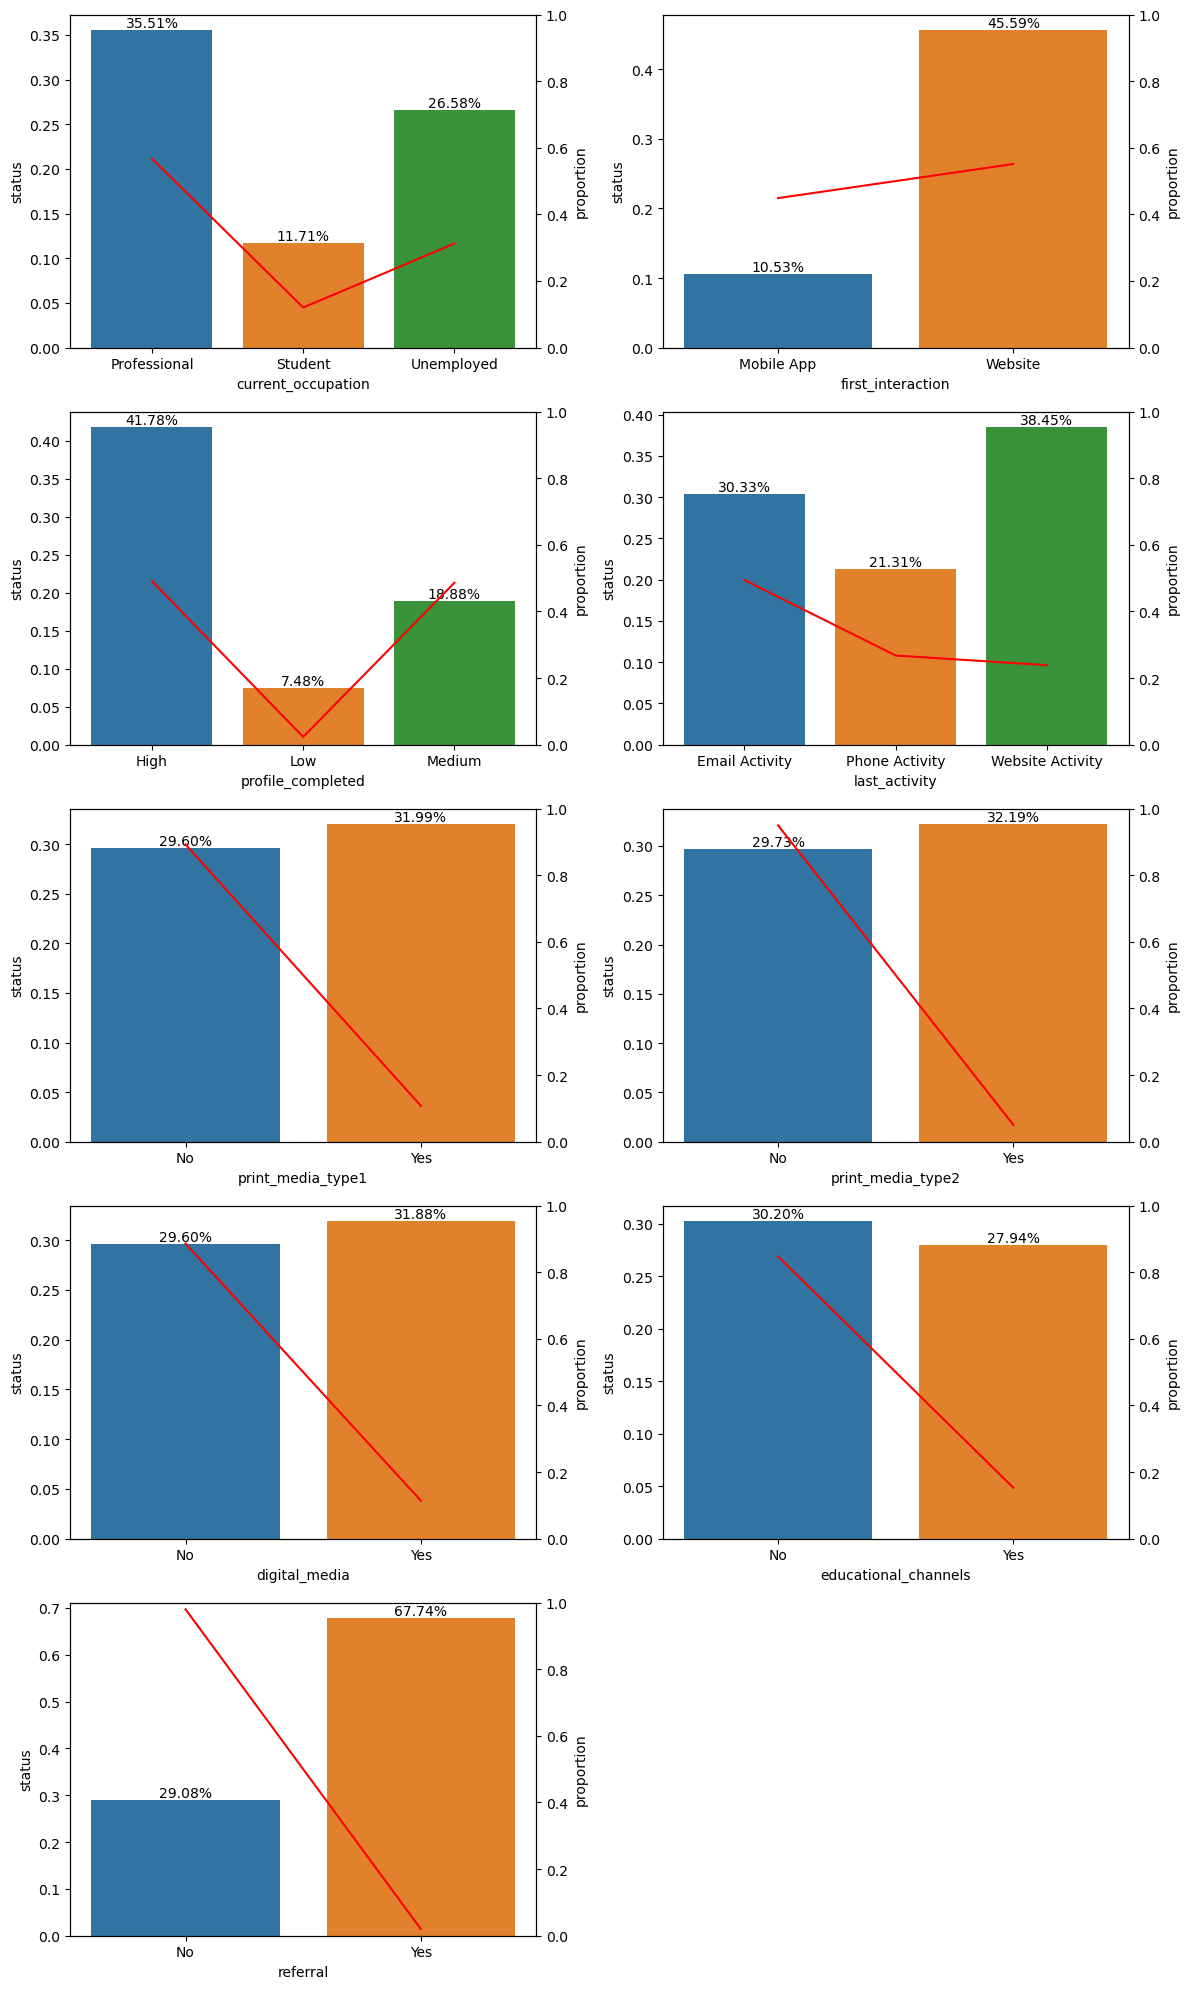

In [570]:
#Plot using the sns_bars functions defined above.

plt.figure(figsize=(12,20))

for i, variable in enumerate(cat_cols2):
    plt.subplot(5,2,i+1)
    cat_sum=df.groupby(variable)['status'].mean().reset_index() #calculate average conversion rate by category
    cnt=df[variable].value_counts(normalize=True).reset_index() #calculate proportion of the category
    cat_sum=cat_sum.merge(cnt, on=variable, how='outer') #merge the two tables
    sns_bars(cat_sum, variable, cat_sum.columns[cat_sum.shape[1]-2], cat_sum.columns[cat_sum.shape[1]-1])
    plt.tight_layout()
plt.show()


In [571]:
#Check how current occupation and marketing channels relates to the conversion rate 'status'
print(df.groupby(['current_occupation','print_media_type1'])['status'].mean())
print('*'*50)
print(df.groupby(['current_occupation','print_media_type2'])['status'].mean())
print('*'*50)
print(df.groupby(['current_occupation','digital_media'])['status'].mean())
print('*'*50)
print(df.groupby(['current_occupation','educational_channels'])['status'].mean())
print('*'*50)
print(df.groupby(['current_occupation','referral'])['status'].mean())
print('*'*50)
print(df.groupby(['current_occupation','first_interaction'])['status'].mean())
print('*'*50)

current_occupation  print_media_type1
Professional        No                  0.3506
                    Yes                 0.3916
Student             No                  0.1148
                    Yes                 0.1343
Unemployed          No                  0.2660
                    Yes                 0.2639
Name: status, dtype: float64
**************************************************
current_occupation  print_media_type2
Professional        No                  0.3550
                    Yes                 0.3566
Student             No                  0.1189
                    Yes                 0.0800
Unemployed          No                  0.2624
                    Yes                 0.3385
Name: status, dtype: float64
**************************************************
current_occupation  digital_media
Professional        No              0.3509
                    Yes             0.3861
Student             No              0.1147
                    Yes             0

## Data Preprocessing

- Missing value treatment (if needed): there are no missing values in the data.
- Feature engineering (if needed): applied variable encoding techniques.
- Outlier detection and treatment (if needed): we observed outliers in variable website_visits and page_views_per_visit. The decision is not to treat them because decision tree and random forecast are generally robust to outliers.  
- Preparing data for modeling: split the data into train and test data. Check for accuracy. 
- Any other preprocessing steps (if needed)

In [572]:
#encode categorical variables
# Creating the list of columns for which we need to create the dummy variables
to_get_dummies_for = ['current_occupation', 'profile_completed', 'last_activity', 'first_interaction']

# Creating dummy variables
df = pd.get_dummies(data = df, columns = to_get_dummies_for, drop_first = True)      

# Mapping Yes, No values
cat_mapping = {'Yes': 1, 'No': 0}

to_map_for =['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

for c in to_map_for:
    df[c] = df[c].map(cat_mapping)


In [573]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4612 non-null   int64  
 1   website_visits                  4612 non-null   int64  
 2   time_spent_on_website           4612 non-null   int64  
 3   page_views_per_visit            4612 non-null   float64
 4   print_media_type1               4612 non-null   int64  
 5   print_media_type2               4612 non-null   int64  
 6   digital_media                   4612 non-null   int64  
 7   educational_channels            4612 non-null   int64  
 8   referral                        4612 non-null   int64  
 9   status                          4612 non-null   int64  
 10  current_occupation_Student      4612 non-null   bool   
 11  current_occupation_Unemployed   4612 non-null   bool   
 12  profile_completed_Low           46

In [575]:
#Validate the new category indicator columns were done corretly
df[['current_occupation_Student','current_occupation_Unemployed', 'profile_completed_Low', 'profile_completed_Medium', 'last_activity_Phone Activity', 'last_activity_Website Activity', 'first_interaction_Website']].mean()

current_occupation_Student       0.1203
current_occupation_Unemployed    0.3124
profile_completed_Low            0.0232
profile_completed_Medium         0.4859
last_activity_Phone Activity     0.2676
last_activity_Website Activity   0.2385
first_interaction_Website        0.5512
dtype: float64

In [576]:
#Separating the target variable and other variables
Y = df.status
X = df.drop(columns = ['status'])

In [577]:
#Splitting the data to allocate 30% to test and 70% to train.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

In [578]:
#Check for train test split randomness
print('x_train stats')
x_train.describe().T

x_train stats


,count,mean,std,min,25%,50%,75%,max
age,3228.0000,46.1552,13.1486,18.0000,36.0000,51.0000,57.0000,63.0000
website_visits,3228.0000,3.6428,2.8704,0.0000,2.0000,3.0000,5.0000,29.0000
time_spent_on_website,3228.0000,727.6747,747.1786,0.0000,143.7500,376.5000,1363.7500,2537.0000
page_views_per_visit,3228.0000,3.0832,1.9790,0.0000,2.0938,2.8650,3.7780,18.4340
print_media_type1,3228.0000,0.1100,0.3129,0.0000,0.0000,0.0000,0.0000,1.0000
print_media_type2,3228.0000,0.0530,0.2240,0.0000,0.0000,0.0000,0.0000,1.0000
digital_media,3228.0000,0.1112,0.3144,0.0000,0.0000,0.0000,0.0000,1.0000
educational_channels,3228.0000,0.1568,0.3636,0.0000,0.0000,0.0000,0.0000,1.0000
referral,3228.0000,0.0189,0.1362,0.0000,0.0000,0.0000,0.0000,1.0000


In [579]:
print('x_test stats')
x_test.describe().T

x_test stats


,count,mean,std,min,25%,50%,75%,max
age,1384.0000,46.3085,13.1954,18.0000,35.0000,51.0000,57.0000,63.0000
website_visits,1384.0000,3.3895,2.7233,0.0000,2.0000,3.0000,5.0000,30.0000
time_spent_on_website,1384.0000,715.4668,736.1537,0.0000,156.7500,375.0000,1283.7500,2531.0000
page_views_per_visit,1384.0000,2.8931,1.9366,0.0000,2.0417,2.6395,3.7095,18.3020
print_media_type1,1384.0000,0.1026,0.3035,0.0000,0.0000,0.0000,0.0000,1.0000
print_media_type2,1384.0000,0.0448,0.2069,0.0000,0.0000,0.0000,0.0000,1.0000
digital_media,1384.0000,0.1214,0.3267,0.0000,0.0000,0.0000,0.0000,1.0000
educational_channels,1384.0000,0.1438,0.3510,0.0000,0.0000,0.0000,0.0000,1.0000
referral,1384.0000,0.0231,0.1503,0.0000,0.0000,0.0000,0.0000,1.0000


In [580]:
print('y_train:', y_train.mean(), 'y_test:', y_test.mean())

y_train: 0.298636926889715 y_test: 0.2984104046242775


## Building a Decision Tree model

Comments:
- The objective is to identify which of the leads are more likely to convert so that ExtraaLearn can allocate the resources accordingly. Therefore, it is more important to identify as many as leads who will convert, i.e. recall score is more important than precision or accuracy. The model that doesn't overfit and has higher recall score on the test dataset will be the winner.
- The leads conversion rate is about 30%, little bit imbalanced. Given that we want to forecast class 1 (i.e. converting leads) more accurately, we will assign higher class weights to class 1.
- We will build one decision tree, then utilize GridSerchCV to tune the hyperparameters. Please note the hyperparameters in the code below are chosen after a few trials.

In [581]:
# Creating a metric function to show (1) precision, recall and F1 score by class; and (2) confusion matrix and the heatmap for better visualization.

def metrics_score(actual, predicted):
    
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    print('*'*50)
    print(cm)
    print('*'*50)
    plt.figure(figsize = (6, 3))
    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [582]:
# Creating a function to show the average recision, recall and accuracy score for the tree. This will allow easy comparison across models.
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance
    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)
    recall = recall_score(target, pred, average = 'macro')                 # To compute recall
    precision = precision_score(target, pred, average = 'macro')              # To compute precision
    acc = accuracy_score(target, pred)                                 # To compute accuracy score

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },
        index = [0],
    )

    return df_perf

In [583]:
# Calculate class weights. 
# The leads conversion rate is about 30%, little bit imbalanced. 
# Given that we want to forecast class 1 (i.e. converting leads) more accurately, we will assign higher class weights to class 1.

w1=1/(2*y_train.mean())
w0=1/(2*(1-y_train.mean()))
print('class 0:', w0, 'class 1:', w1)

class 0: 0.7128975265017667 class 1: 1.6742738589211619


In [584]:
# Building decision tree model with above pre-calculated weights
dt = DecisionTreeClassifier(class_weight = {0: w0, 1: w1}, random_state = 1)

In [585]:
# Fitting decision tree model on the training dataset
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.7128975265017667,
                                     1: 1.6742738589211619},
                       random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228

**************************************************
[[2262    2]
 [   0  964]]
**************************************************


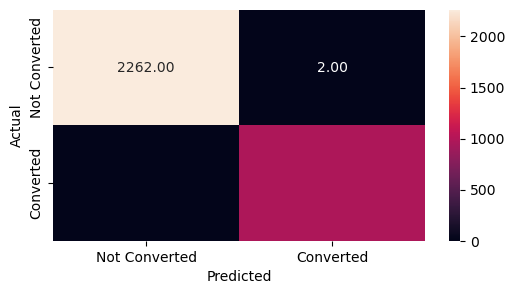

In [586]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       971
           1       0.65      0.62      0.64       413

    accuracy                           0.79      1384
   macro avg       0.75      0.74      0.74      1384
weighted avg       0.79      0.79      0.79      1384

**************************************************
[[834 137]
 [155 258]]
**************************************************


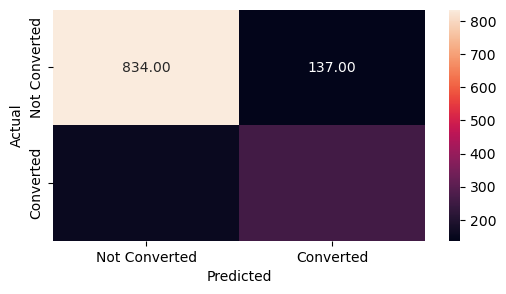

In [587]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [588]:
dtree_test = model_performance_classification(dt,x_test,y_test)
dtree_test

,Precision,Recall,Accuracy
0,0.7482,0.7418,0.7890


# <font size="4">Observations</font>
- Model is overfitting with only 2 misclassfications on the training dataset.
- The model is not performing well on the test dataset. The recall score for class 1 is only 0.62, meaning it only idendified 62% of leads that will convert. The average recall of both classes is 0.74.
- The feature importance checking below showed the most important features are time_spent_on_website, first_interaction_Website, profile_completed_Medium, page_views_per_visit and age. This is largely inline with the observations from the bivariante analysis. 

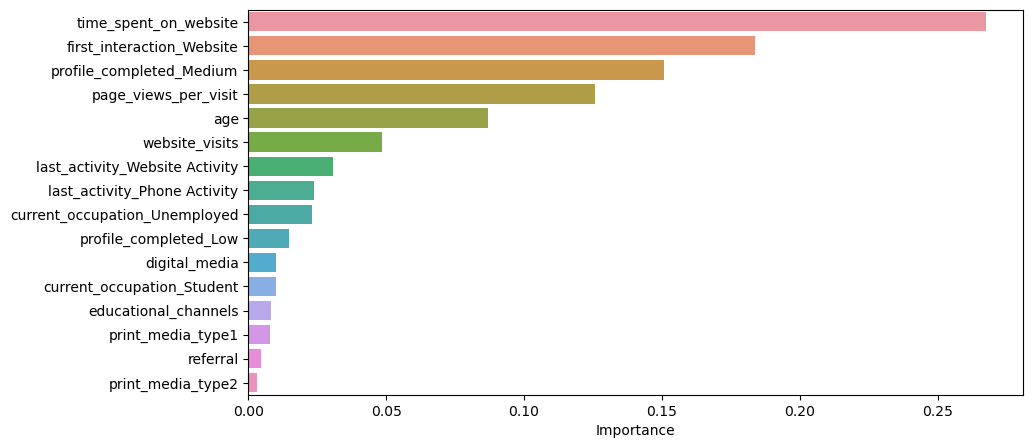

In [201]:
# Plot the feature importance

importances = dt.feature_importances_
columns = X.columns
importance_dt = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (10, 5))
sns.barplot(x=importance_dt.Importance,y=importance_dt.index);

## Model Performance evaluation and improvement
We will utilize GridSerchCV to tune the hyperparameters. Please note the hyperparameters in the code below are chosen after a few trials.

In [589]:
# Initialize a new decision tree classifier
dtree_estimator = DecisionTreeClassifier(class_weight = {0: w0, 1: w1}, random_state = 1)

# Set the grid of parameters to choose from. Please note the hyperparameters in the code below are chosen after a few trials.
parameters = {'max_depth': np.arange(2, 7),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [1, 2, 3, 4, 5, 10]
             }

# Set recall score of class 1 as the scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search with 10 fold cross-validation
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10) 

# Fitting the grid search on the train data
gridCV = gridCV.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.7128975265017667,
                                     1: 1.6742738589211619},
                       max_depth=3, random_state=1)

In [595]:
# Check what results are available to view from the GridSearchCV. 
# We want to print the hyperparameter values and mean_test_score and decide how to revise the hyperparameter values.

gridCV_results_dt=pd.DataFrame(gridCV.cv_results_)
gridCV_results_dt.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_min_samples_leaf',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [596]:
# Print the gridSearchCV results
gridCV_results_dt[['param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'mean_test_score']].sort_values('mean_test_score', ascending=False).head(10)

,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score
37,entropy,3,2,0.9066
8,gini,3,3,0.9066
40,entropy,3,5,0.9066
38,entropy,3,3,0.9066
39,entropy,3,4,0.9066
36,entropy,3,1,0.9066
10,gini,3,5,0.9066
9,gini,3,4,0.9066
11,gini,3,10,0.9066
7,gini,3,2,0.9066


# <font size="4">Observations</font>
The gridSearchCV results table above is used to determine hyperparameter values to try out. Tree max depth 3 seems to be the most important value, tree node split criterion and minimum samples per leaf do not change the mean test score much.

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2264
           1       0.60      0.91      0.72       964

    accuracy                           0.79      3228
   macro avg       0.78      0.83      0.78      3228
weighted avg       0.85      0.79      0.80      3228

**************************************************
[[1688  576]
 [  90  874]]
**************************************************


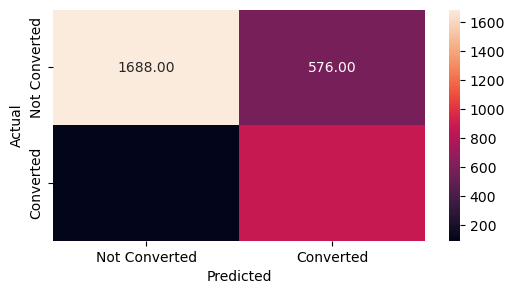

In [597]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_estimator.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.94      0.73      0.82       971
           1       0.58      0.89      0.70       413

    accuracy                           0.78      1384
   macro avg       0.76      0.81      0.76      1384
weighted avg       0.83      0.78      0.79      1384

**************************************************
[[709 262]
 [ 46 367]]
**************************************************


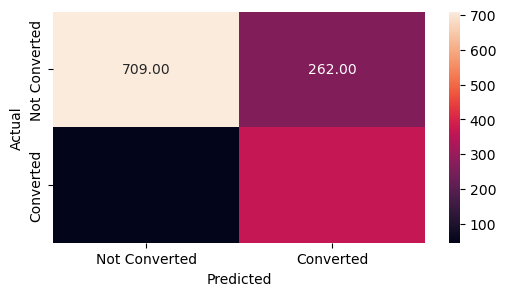

In [598]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [599]:
dtree_tuned_test = model_performance_classification(dtree_estimator,x_test,y_test)
dtree_tuned_test

,Precision,Recall,Accuracy
0,0.7613,0.8094,0.7775


# <font size="4">Observations</font>
- The tuned model has similar performance scores on the training and testing dataset, indicating it is not overfitting.
- The recall score for testing dataset class 1 is 0.89, meaning it idendified 89% of leads that will convert. The average recall of both classes is 0.81. This is a big improvement comparing with the original decision tree.
- The max_depth hyperparameter for the best tuned decision tree is three, other hyperparameter values didn't seem to change the recall score much. 
- The feature importance checking below showed the most important features are first_interaction_Website, time_spent_on_website, and profile_completed_Medium. 

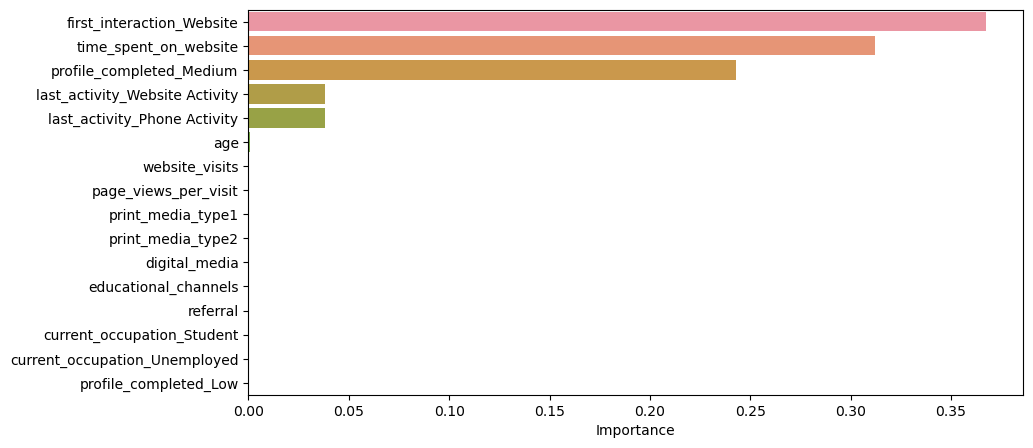

In [251]:
importances = dtree_estimator.feature_importances_
columns = X.columns
importance_dtree_estimator = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (10, 5))
sns.barplot(x= importance_dtree_estimator.Importance, y= importance_dtree_estimator.index);

In [252]:
#compare the model performance of the first two decision tree models
pd.DataFrame({ "Decision Tree classifier": dtree_test.loc[0,:], "Tuned Decision Tree classifier": dtree_tuned_test.loc[0,:]})

,Decision Tree classifier,Tuned Decision Tree classifier
Precision,0.748,0.761
Recall,0.742,0.809
Accuracy,0.789,0.777


In [253]:
importance_compare=pd.concat([importance_dt, importance_dtree_estimator], axis=1)
importance_compare.columns=['Decision Tree classifier', 'Tuned Decision Tree classifier']
importance_compare

,Decision Tree classifier,Tuned Decision Tree classifier
time_spent_on_website,0.268,0.312
first_interaction_Website,0.184,0.368
profile_completed_Medium,0.151,0.243
page_views_per_visit,0.126,0.000
age,0.087,0.001
website_visits,0.049,0.000
last_activity_Website Activity,0.031,0.038
last_activity_Phone Activity,0.024,0.038
current_occupation_Unemployed,0.023,0.000
profile_completed_Low,0.015,0.000


# <font size="4">Observations</font>
- Tuned decision classifier is clearly the winner with better recall and precision scores. Accuracy score of two models are similar.
- The top three most important features are same for both models, though time_spent_on_website is ranked as #1 in the first model and #2 in the tuned model. page_views_per_vists and age are not showing as important features in the tuned model.
- By plotting the decision tree of the tuned model, we can identify the following segments of leads who are calssified as 1, i.e. more likely to convert to paid customers.
  1. The first interaction with ExtraaLearn was Website, spent more than 414 seconds (or about 7 minutes) total time on the website, last interaction with ExtraaLearn was not phone: 18.7% of leads with 89.7% chance of converting to paid customers
  2. The first interaction with ExtraaLearn was Website, spent more than 414 seconds (or about 7 minutes) total time on the website, profile completion is not Medium: 14.9% of leads with 71.2% chance of converting to paid customers
  3. The first interaction with ExtraaLearn was not Website, spent more than 419 seconds (or about 7 minutes) total time on the website, last interaction with ExtraaLearn was website: 5.2% of leads with 65.7% chance of converting to paid customers
  4. The first interaction with ExtraaLearn was Website, spent more than 414 seconds (or about 7 minutes) total time on the website, last interaction with ExtraaLearn was phone: 6.1% of leads with 59.9% chance of converting to paid customers

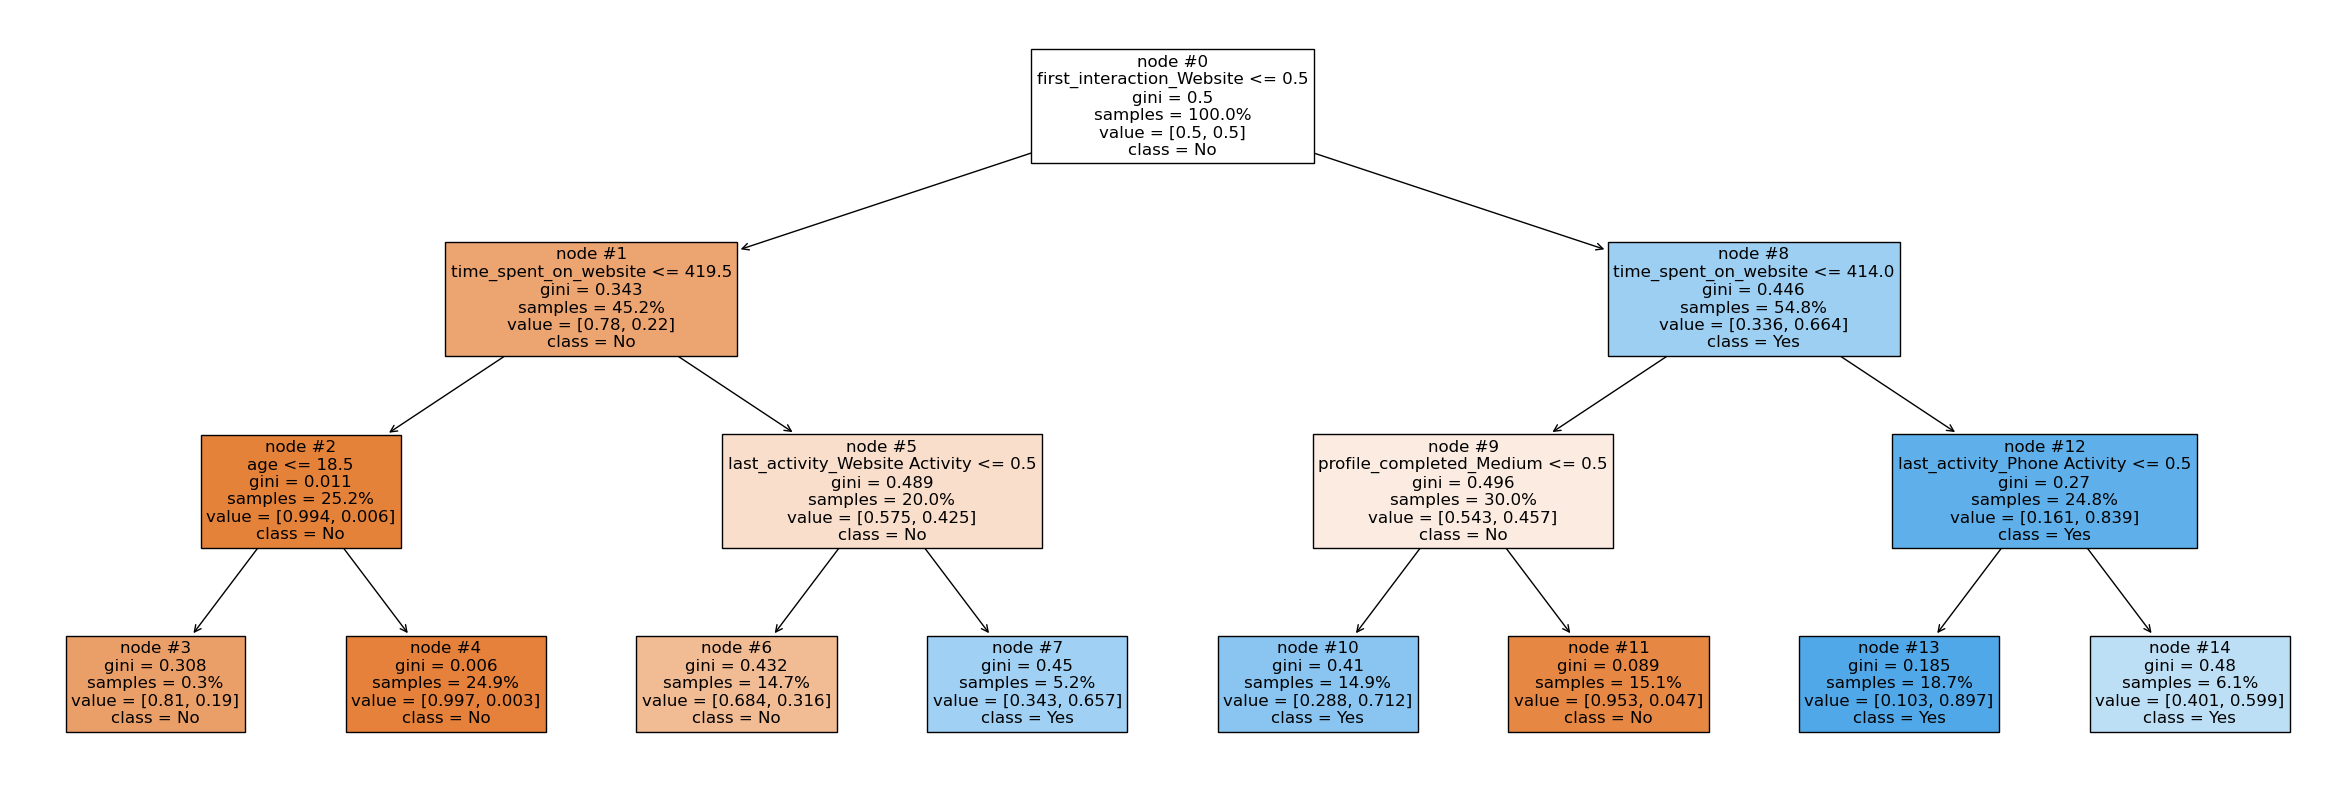

In [254]:
# Plot the tree of the tuned model
features = list(X.columns)
target_name = ['No', 'Yes']

plt.figure(figsize = (30, 10))
tree.plot_tree(dtree_estimator, max_depth = 3, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = target_name, proportion = True)
plt.show()

## Building a Random Forest model
Comments:
- Similarly, we will build one random forest tree, then utilize GridSerchCV to tune the hyperparameters. Please note the hyperparameters in the code below are chosen after a few trials.
- We will utilize the same class weight as in the decision tree above.

In [604]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: w0, 1: w1}, random_state = 1)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.7128975265017667,
                                     1: 1.6742738589211619},
                       random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228

**************************************************
[[2262    2]
 [   0  964]]
**************************************************


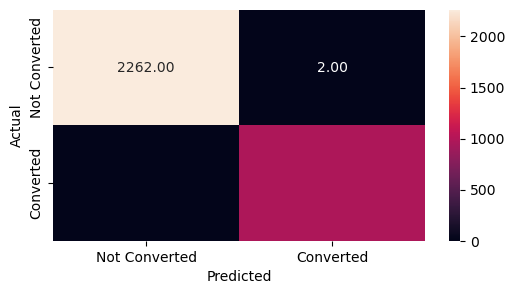

In [605]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       971
           1       0.78      0.71      0.74       413

    accuracy                           0.85      1384
   macro avg       0.83      0.81      0.82      1384
weighted avg       0.85      0.85      0.85      1384

**************************************************
[[891  80]
 [121 292]]
**************************************************


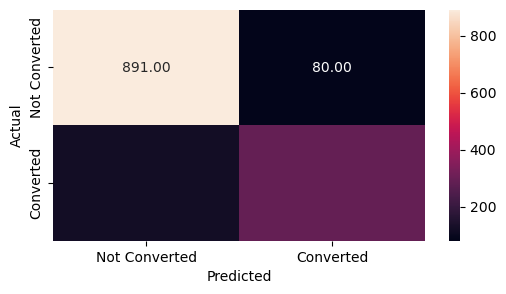

In [606]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

In [607]:
rf_estimator_test = model_performance_classification(rf_estimator,x_test,y_test)
rf_estimator_test

,Precision,Recall,Accuracy
0,0.8327,0.8123,0.8548


# <font size="4">Observations</font>
- Model is overfitting with only 2 misclassfications on the training dataset.
- The model is not performing well on the test dataset. The recall score for class 1 is 0.71, meaning it idendified 71% of leads that will convert. This is not as good as the tuned decision tree, though the accuracy score is higher than the tuned decision tree.
- The feature importance checking below showed the most important features are time_spent_on_website, first_interaction_Website, profile_completed_Medium, page_views_per_visit and age. This is the same as the first decision tree model. 

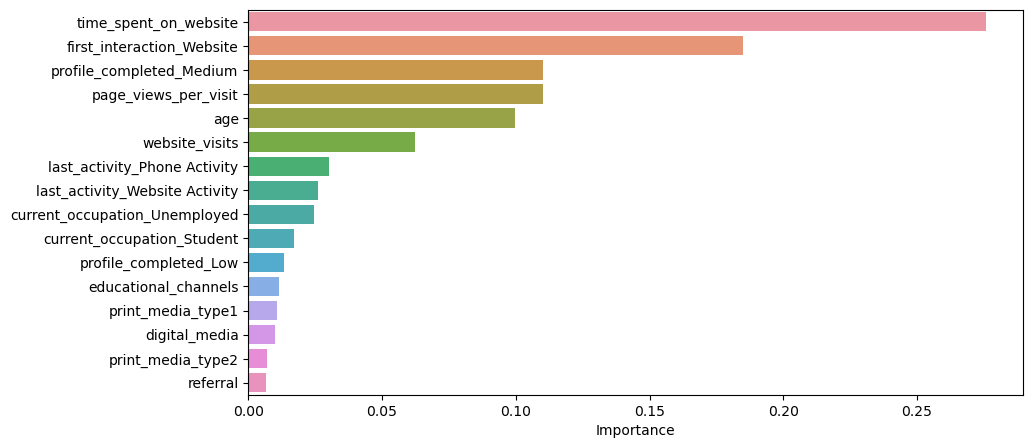

In [608]:
importances = rf_estimator.feature_importances_

columns = X.columns
importance_rf_estimator = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (10, 5))
sns.barplot(x= importance_rf_estimator.Importance, y=importance_rf_estimator.index);

## Model Performance evaluation and improvement
We will utilize GridSerchCV to tune the hyperparameters. Please note the hyperparameters in the code below are chosen after a few trials.

In [609]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: w0, 1: w1}, random_state = 1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [400, 500, 600],
        "min_samples_leaf":  [3, 5, 10, 15, 20],
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV_rf = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

gridCV_rf = gridCV_rf.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = gridCV_rf.best_estimator_

In [610]:
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.7128975265017667,
                                     1: 1.6742738589211619},
                       max_features=0.7, min_samples_leaf=20, n_estimators=400,
                       random_state=1)

In [611]:
# Display gridSearchCV results and use it to fine tune hyperparameter values
gridCV_results_rf=pd.DataFrame(gridCV_rf.cv_results_)
gridCV_results_rf.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_features', 'param_min_samples_leaf', 'param_n_estimators',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [612]:
gridCV_results_rf[['param_n_estimators', 'param_min_samples_leaf', 'param_max_features', 'mean_test_score']].sort_values('mean_test_score', ascending=False).head(10)

,param_n_estimators,param_min_samples_leaf,param_max_features,mean_test_score
13,500,20,0.7000,0.8631
12,400,20,0.7000,0.8631
27,400,20,0.9000,0.8631
14,600,20,0.7000,0.8631
29,600,20,0.9000,0.8590
43,500,20,auto,0.8579
42,400,20,auto,0.8579
28,500,20,0.9000,0.8569
44,600,20,auto,0.8569
41,600,15,auto,0.8517


# <font size="4">Observations</font>
The gridSearchCV results table above is used to determine hyperparameter values to try out. 400-500 estimators seem to be good enough after trying up to 700.

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      2264
           1       0.70      0.88      0.78       964

    accuracy                           0.85      3228
   macro avg       0.82      0.86      0.83      3228
weighted avg       0.87      0.85      0.86      3228

**************************************************
[[1905  359]
 [ 118  846]]
**************************************************


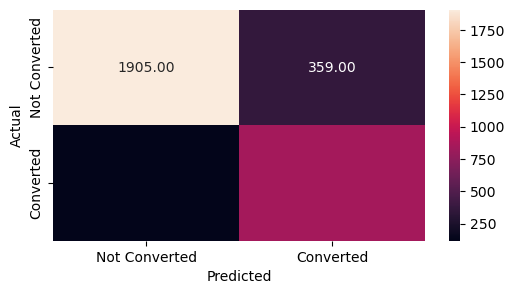

In [613]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       971
           1       0.67      0.82      0.74       413

    accuracy                           0.83      1384
   macro avg       0.79      0.83      0.81      1384
weighted avg       0.84      0.83      0.83      1384

**************************************************
[[805 166]
 [ 73 340]]
**************************************************


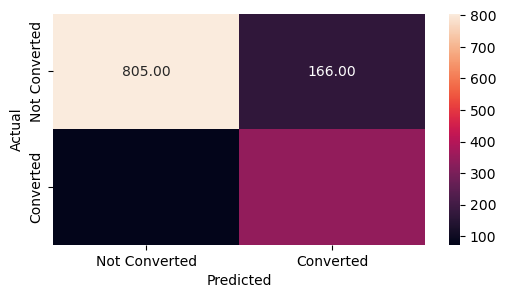

In [614]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)

metrics_score(y_test, y_pred_test_rf_tuned)

In [615]:
rf_estimator_tuned_test = model_performance_classification(rf_estimator_tuned, x_test, y_test)
rf_estimator_tuned_test

,Precision,Recall,Accuracy
0,0.7944,0.8261,0.8273


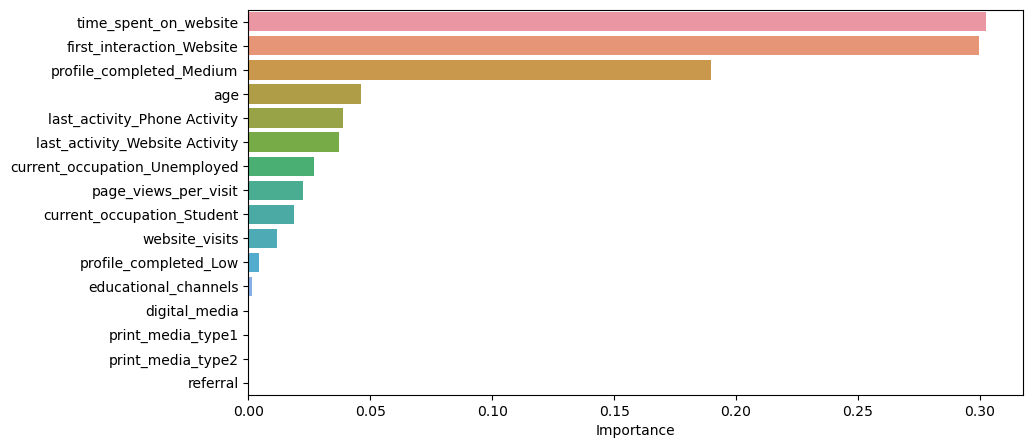

In [616]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_
columns = X.columns
importance_rf_estimator_tuned = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (10, 5))
sns.barplot(x= importance_rf_estimator_tuned.Importance, y= importance_rf_estimator_tuned.index);

# <font size="4">Observations</font>
- The tuned model performs similarly on the training and testing data set, indicating it is not overfitting.
- The tuned model has higher class 1 recall score than the first model (0.82 vs. 0.71), F1 scores are similar. Accuracy scores are similar too. Hence we can conclude that tuned random forest model is better than the first un-tuned random forest model. 
- The feature importance checking showed the most important features for the tuned randome forest model are time_spent_on_website, first_interaction_Website, profile_completed_Medium. This is the same as the tuned decision tree model. 

In [617]:
#compare the model performance of all four models together
pd.DataFrame({ "Decision Tree classifier": dtree_test.loc[0,:], 
              "Tuned Decision Tree classifier": dtree_tuned_test.loc[0,:],
             'Random Forest classifier': rf_estimator_test.loc[0,:], 
              'Tuned Random Forest classifier': rf_estimator_tuned_test.loc[0,:]})

,Decision Tree classifier,Tuned Decision Tree classifier,Random Forest classifier,Tuned Random Forest classifier
Precision,0.7482,0.7613,0.8327,0.7944
Recall,0.7418,0.8094,0.8123,0.8261
Accuracy,0.7890,0.7775,0.8548,0.8273


In [618]:
# Show feature importance of all four models to compare

importance_compare=pd.concat([importance_dt, importance_dtree_estimator, importance_rf_estimator, importance_rf_estimator_tuned], axis=1)
importance_compare.columns=['Decision Tree classifier', 'Tuned Decision Tree classifier',  'Random Forest classifier', 'Tuned Random Forest classifier']
importance_compare

,Decision Tree classifier,Tuned Decision Tree classifier,Random Forest classifier,Tuned Random Forest classifier
time_spent_on_website,0.2676,0.3123,0.2759,0.3026
first_interaction_Website,0.1836,0.3676,0.1850,0.2998
profile_completed_Medium,0.1508,0.2429,0.1102,0.1896
page_views_per_visit,0.1259,0.0000,0.1102,0.0225
age,0.0868,0.0008,0.0997,0.0463
website_visits,0.0485,0.0000,0.0622,0.0119
last_activity_Website Activity,0.0308,0.0382,0.0259,0.0370
last_activity_Phone Activity,0.0239,0.0382,0.0301,0.0386
current_occupation_Unemployed,0.0232,0.0000,0.0247,0.0271
profile_completed_Low,0.0147,0.0000,0.0133,0.0043


# <font size="4">Final model selection</font>
The tuned decision tree model and tuned random forecast model are both better than its un-tuned models, so we will compare tuned decision tree and tuned random forecast models to select a better one.
- Class 1 recall score: 0.89 for tuned decision tree model, 0.82 for tuned random forecast model
- Class 1 F1 score: 0.7 for tuned decision tree model, 0.74 for tuned random forecast model
- Average recall score: 0.81 for tuned decision tree model, 0.83 for tuned random forecast model
- Average precision score: 0.76 for tuned decision tree model, 0.79 for tuned random forecast model
- Accuracy score: 0.78 for tuned decision tree model, 0.83 for tuned random forecast model

The final model we decide to use is the tuned decision tree model because of the following reasons:
1. Given that the business objective is to identify which of the leads are more likely to convert so that ExtraaLearn can allocate the resources accordingly, we should put more focus on class 1 recall score. Tuned random forest model is slightly better than tuned decision tree model for all scores mentioned above except for the class 1 recall score. Tuned decision tree has much better class 1 recall score than the tuned random forest model. 
2. Decision tree model is much easier to visualize and explain to the business.
3. Decison tree model is simplier and easier to implement than the random forest model.  

## Actionable Insights and Recommendations

Leads generation:
- The business should grow the referral program, for example provide referral discount etc. Leads who were referrals had very high conversion rate of 67.7% vs. 29.1% for non-referrals. However the referral leads is only 2% of the total leads.
- The business should target to generate leads from professional and unemployed segments first. Student leads have very low conversion rate (11.7%), further analysis should be done to check if student leads are profitable. 
- The business could consider designing a special advertisement for professionals in the newspaper and digital media channel. For professional leads, newspaper and digital media channel had slightly higher conversion rate than the magazine channel. 
- The business could consider designing a special advertisement for unemployed leads in the magazine channel. Also, look into improving the ads in the newspaper and digital channel. For unemployed leads, magazine channel had higher conversion rate than newspaper and digital channels. Newspaper and digital channels didn't seem to help to improve the conversion rate.
- The business should investigate the ads in the educational channel because it doesn't seem to help with the conversion rate.

Improve leads engagement and customer experience
- The first interaction with the company matters. If the first interaction was website, the conversion rate was 45.6%, while it was 10.5% for mobile app. The business should look into the difference of the customer experience in both channels and improve the mobile app experience. Meanwhile, the business should direct the traffic of all leads to the website as much as possible.
- Leads with High profile completion (75%+) had conversion rate of 41.8%, while it was 18.9% for Medium completion and 7.5% for Low completion. The business should consider reviewing the process flow for profile creation and evaluating which steps caused the most frictions. This may help to improve the customer experience and increase the profile completion rate.
- Leads with last activity as website had conversion rate of 38.5%, while it was 30.3% for email and 21.3% for phone. The business could consider evaluating the process flow of all channels and close the gaps, especially the phone channel. Meanwhile, the business should try to direct the traffic to website as much as possible, followed by email channel then phone.

Maximize leads conversion rate
- The business should classify the leads using the tuned decision tree model and allocate resources to leads who is classified as likely to convert.
- For the rest leads, the business should monitor their behavior changes and check the change in the three most important features (total time spent on the website, first interaction with the business and the profile completion). For example, the leads that keep coming back to the website and spend time on it has more potential to convert. Business could consider allocating the resource to these types of leads who are trending to convert.

Unit profit analysis
- The business could consider gathering morethedata to conduct a unit profit analysis and find the break-event cost for different channels and profiles. For example, more analysis could be done to look at revenue  for different channels and profilesper paid customer.